<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/Error_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Error Backpropagation

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1.실습용 데이터 생성

In [3]:
import numpy as np

np.set_printoptions(suppress = True, precision = 3)

### 1)Input : X (4 * 3) 

In [4]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

### 2)Output : y (4 * 1)

In [5]:
y = np.array([0., 1., 1., 0.]).reshape(4,1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

### 3)W1 (3 * 4)

In [6]:
#행렬의 곱을 위해 3 * 4 형태로 만듬 => (4 * 3) * (3 * 4) = (4 * 4)
np.random.seed(2045)
W1 = np.random.rand(3, 4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

### 4)W2 (4 * 1)

In [7]:
# (4 * 4) * (4 * 1) = (4 * 1)
np.random.seed(2046)
W2 = np.random.rand(4)

W2 = W2.reshape(4, 1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

### 5)y_hat (4 * 1)

In [8]:
np.random.seed(2045)
y_hat = np.random.rand(4).reshape(4,1)

y_hat

array([[0.844],
       [0.886],
       [0.139],
       [0.061]])

### 6)Layer1 (4 * 4)

In [9]:
Layer1 = np.ones([4,4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

## 2.함수 정의

### 1)sigmoid()

* Activation Function

In [11]:
def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

### 2)d_sigmoid()
* sigmoid() 미분함수

In [12]:
def d_sigmoid(x):
  dy = x * (1.0 - x)
  return dy

### 3)Loss function
* Mean Squared Error

In [13]:
#def loss_function(y, y_hat):
#  Loss = np.mean((y - y_hat)**2)
#  return Loss

* Binary Cross Entropy Error

In [14]:
def loss_function(y, y_hat):
  Loss = -np.mean((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))
  return Loss

## 3.순방향과 역방향 함수 정의
### 1)Forward_ Propagation
* Layer1 Output
  * Layer1 = sigmoid(np.dot(X, W1)
* y_hat Output
  * y_hat = sigmoid(np.dot(Layer1, W2))

In [15]:
def forwardProp(X, W1, Layer1, W2, y_hat):
  Layer1 = sigmoid(np.dot(X, W1))
  y_hat = sigmoid(np.dot(Layer1,W2))

  return Layer1, y_hat

### 2)Back_Propagation
* d_W2
  * d_W2 = np.dot(np.transpose(Layer1), (-2 * (y - y_hat) * d_sigmoid(y_hat))) 
* d_W1
  * d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2)) d_W1 = d_W1 * d_sigmoid(Layer1) d_W1 = np.dot(np.transpose(X), d_W1)
* Gradient Descent
  * W1 = W1 - (0.001 * d_W1) 
  * W2 = W2 - (0.001 * d_W2)

In [31]:
def backProp(X, y, y_hat, Layer1, W1, W2):
  d_W2 = np.dot(np.transpose(Layer1), (-2 * (y - y_hat) * d_sigmoid(y_hat)))

  d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
  d_W1 = d_W1 * d_sigmoid(Layer1)
  d_W1 = np.dot(np.transpose(X), d_W1)

  W1 = W1 - d_W1
  W2 = W2 - d_W2

  return y_hat, Layer1, W1, W2

## 4.오차역전파를 적용한 Gradient Descent
* 학습 과정의 Loss값 저장 객체

In [32]:
Loss_Record = []


### 1)Learning with Error Backpropagation

In [33]:
for k in range(0, 1000):
  Layer1, y_hat = forwardProp(X, W1, Layer1, W2, y_hat)
  y_hat, Layer1, W1, W2 = backProp(X, y, y_hat, Layer1, W1, W2)

  Loss_Record.append(loss_function(y, y_hat))

### 2)Parameter Update Check
* W1

In [34]:
W1

array([[ 2.33 ,  4.824,  6.845, -4.605],
       [ 2.581,  5.093, -3.344,  7.112],
       [ 1.71 , -0.555,  0.405,  1.512]])

* W2

In [35]:
W2

array([[ 4.69 ],
       [ 8.34 ],
       [-8.528],
       [-8.528]])

* y_hat

In [36]:
# y_hat.round()

y_hat

array([[0.006],
       [0.981],
       [0.981],
       [0.024]])

### 3)Visualization

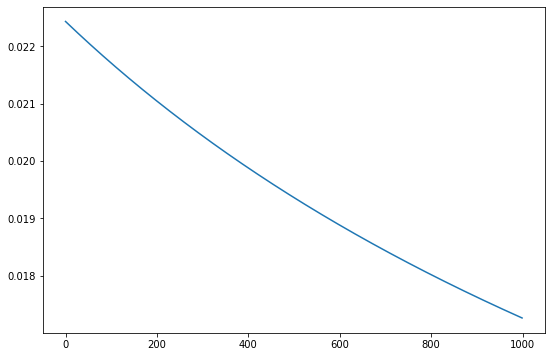

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,6))
plt.plot(Loss_Record)
plt.show()

본 내용은 2021/03/17(수)에 학습한 내용입니다.